Aim: Identify the grouping of motor neurons as recruited by MDN vs different DNs 
or without prior on the input.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
%load_ext autoreload
%autoreload 2


from vnc_networks import MANC
from vnc_networks.connections import Connections
from vnc_networks.specific_neurons import motor_neurons_helper as mns_helper

In [2]:
CR = MANC('v1.0')

# Method choice

In [3]:
distance_metric = 'cosine_in'
clustering_method = 'hierarchical_linkage' # 'hierarchical', 'markov', 'DBSCAN'

## Data loading

In [5]:
VNC = Connections(CR=CR)
motor_neurons = mns_helper.get_leg_motor_neurons(VNC, leg="h", side="RHS")

Attribute class_1 not found in the graph. Adding it.


## Baseline for motor primitives: no DN input bias

In [6]:
# Get the motor neuron clusters in t3 when there is no specific input.

# Restricting
cmatrix_agnostic = VNC.get_cmatrix(type_="unnorm")
premotor_neurons_agnostic = cmatrix_agnostic.list_upstream_neurons(motor_neurons)
nodes = list(set(motor_neurons).union(premotor_neurons_agnostic))
cmatrix_agnostic.restrict_nodes(nodes)

# Clustering
(
    clustered_cmatrix_agnostic, # clustered similarity matrix as cmatrix object
    uid_clusters_agnostic, # list of lists of uids in each cluster
    index_clusters_agnostic, # list of lists of indices in each cluster matching the clustered cmatrix
) = cmatrix_agnostic.detect_clusters(
    distance=distance_metric,
    method=clustering_method,
    cutoff=0.2,
    cluster_size_cutoff=2,
    cluster_data_type="uid",
    cluster_on_subset = motor_neurons,
)

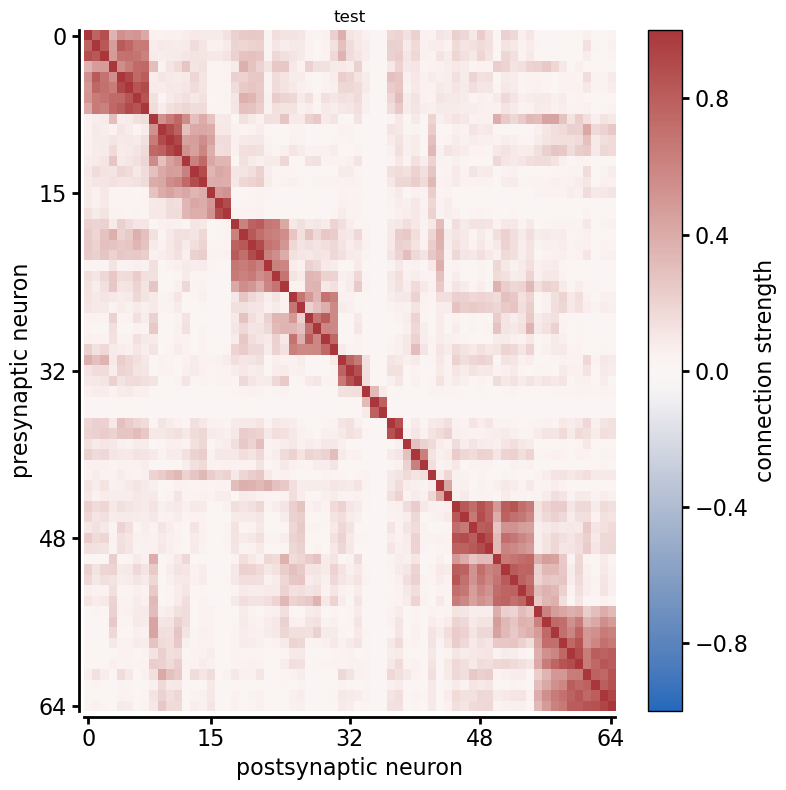

In [9]:
# visualise data
clustered_mat = clustered_cmatrix_agnostic.get_matrix().todense()
# create a matrix of zeros
mat = np.zeros((clustered_mat.shape[0], clustered_mat.shape[1]))
# draw the boundaries between clusters
for cluster in index_clusters_agnostic:
    mat[cluster[0] : cluster[-1] + 1, cluster[0] : cluster[-1] + 1] = 1
ax, title = clustered_cmatrix_agnostic.imshow(savefig=False)
#ax.imshow(mat, cmap="binary", alpha=0.1)
plt.show()


Visualise and compare the motor neuron clusters yielded by the premotor
neurons from circuits in t3 restricted to a DN input in the list or
agnostic of the input.

# bias from different DN inputs

## DN = MDN

# TODO: update to CR

In [7]:
# Get the motor neuron clusters in t3 when there is no specific input.
import specific_neurons.mdn_helper as mdn_helper

# Restricting
mdns = mdn_helper.get_subdivided_mdns(VNC, neuropil="hl", side="RHS")
connections_mdn = VNC.subgraph_from_paths(
    source=mdns,
    target=motor_neurons,
    n_hops=2,
)
cmatrix_input_mdn = connections_mdn.get_cmatrix(type_="unnorm")
premotor_neurons_mdn = cmatrix_input_mdn.list_upstream_neurons(motor_neurons)
nodes = list(set(motor_neurons).union(premotor_neurons_mdn))
cmatrix_input_mdn.restrict_nodes(nodes)

# Clustering
(
    clustered_cmatrix_mdn, # clustered similarity matrix as cmatrix object
    uid_clusters_mdn, # list of lists of uids in each cluster
    index_clusters_mdn, # list of lists of indices in each cluster matching the clustered cmatrix
) = cmatrix_input_mdn.detect_clusters(
    distance=distance_metric,
    method=clustering_method,
    cutoff=0.2,
    cluster_size_cutoff=2,
    cluster_data_type="uid",
    cluster_on_subset = motor_neurons,
)

Attribute class:string not found in the graph. Adding it.


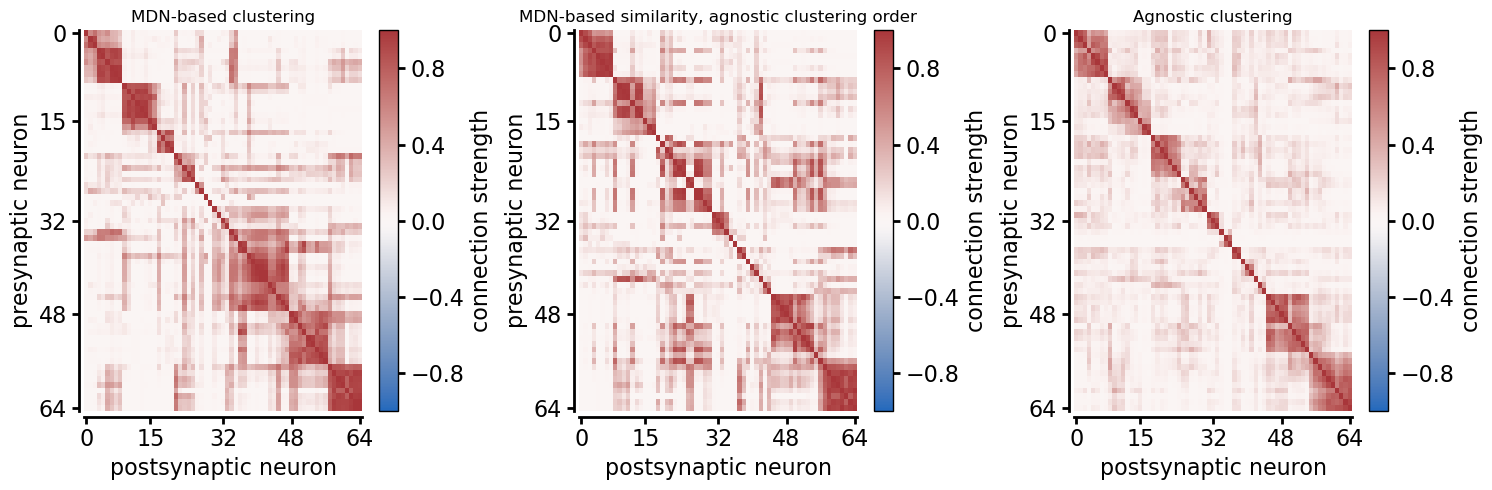

In [8]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

# Left: MDN-based clustering
_ = clustered_cmatrix_mdn.imshow(
    savefig=False,
    ax=axs[0],
    title="MDN-based clustering"
    )


# Middle: MDN-based clustering, Agnostic ordering
# get uids from the agnostic matrix clustering as reference order
agnostic_uids = clustered_cmatrix_agnostic.get_uids()
# arrange the uids in the clustered matrix in the same order as the agnostic matrix
clustered_cmatrix_mdn.restrict_from_to(
    row_ids = agnostic_uids,
    column_ids = agnostic_uids,
    input_type = 'uid',
    keep_initial_order=False, # reorder as the inputs
)
_ = clustered_cmatrix_mdn.imshow(
    savefig=False,
    ax=axs[1],
    title="MDN-based similarity, agnostic clustering order"
    )

# Right: Agnostic clustering
_ = clustered_cmatrix_agnostic.imshow(
    savefig=False,
    ax=axs[2],
    title="Agnostic clustering"
    )
plt.show()